# 1D Random Walk Markov Chain Simulation
### James Saslow 
#### 3/11/2021

In [12]:
import numpy as np
import pylab as plt
from IPython.display import HTML
from math import floor
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [13]:
# Parameters
t = 10000 # Elapsed Time
num = 200 # Number of walks
step_size = 1 # How large steps are in our walk

steps = np.random.randint(0,2,t*num)
for i in range(t*num):
    if steps[i] == 0:
        steps[i] = -1

steps = step_size*steps.reshape(num,t)

# Each row of steps is the steps taken by some random walk

# steps

In [14]:
X = np.zeros((num,t))

for i in range(num):
    for j in range(1,t):
        X[i,j] = X[i,j-1] + steps[i,j-1]
        
# X is the position of each random walk with respect to the origin x=0

# X

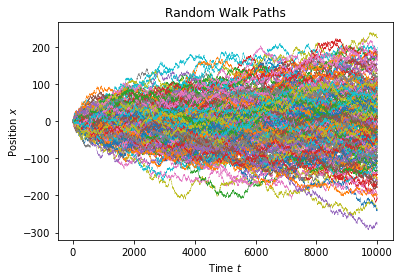

In [26]:
# Plotting some of these random walks
i=0
while i<num:
    plt.plot(X[i],lw=0.3)
    i+=1
    if i==num: # Max Number of random walks displayed
        break

plt.title('Random Walk Paths')
plt.xlabel('Time $t$')
plt.ylabel('Position $x$')
plt.show()

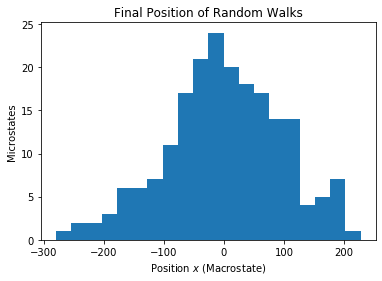

In [16]:
# Xf is the final position after time t
Xf = X[:,-1]

plt.hist(Xf, bins=num//10, density=False)
plt.title('Final Position of Random Walks')
plt.xlabel('Position $x$ (Macrostate)')
plt.ylabel('Microstates')
plt.show()

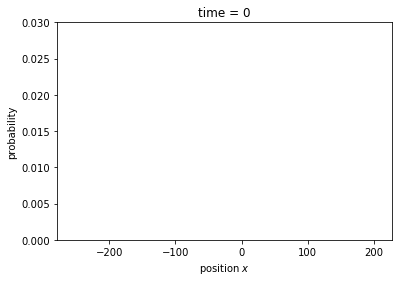

In [24]:
# Looking at time evolution

data = np.transpose(X)

skip = 200
T = np.arange(0,t,skip)


def update_hist(frame, data):
    plt.cla()
    plt.hist(data[T[frame]],bins = num//10, density=True)
    plt.title('time = ' + str(T[frame]))
    plt.xlabel('position $x$')
    plt.ylabel('probability')
    plt.xlim(min(Xf),max(Xf))
    plt.ylim(0,0.03)

    
fig = plt.figure()
hist = plt.hist(data[0],bins=num//10, density = True)
plt.xlim(min(Xf),max(Xf))
plt.ylim(0,1)
plt.xlabel('position $x$')
plt.ylabel('probability')
plt.title('time = ' + str(T[0]))

    
animation = FuncAnimation(fig, update_hist, len(T), fargs=(data, ) )
HTML(animation.to_jshtml())

Distribution of 200 Random Walk Positions


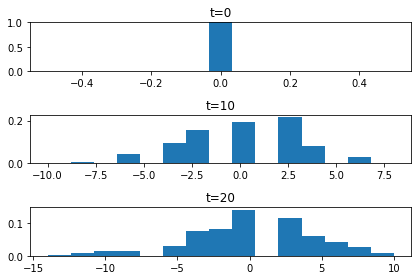

In [18]:
print('Distribution of '+str(num)+ ' Random Walk Positions')
fig, axs = plt.subplots(3, sharex=False, sharey=False)
axs[0].hist(X[:,0], density=True, bins = 15)
axs[0].set_title('t=0')
axs[0].set_ylim([0, 1])
axs[1].hist(X[:,10],density = True, bins = 15)
axs[1].set_title('t=10')
axs[2].hist(X[:,20], density = True, bins = 15)
axs[2].set_title('t=20')
plt.tight_layout()
plt.show()

In [19]:
# Time evolution of mean and standard deviation
mu = np.zeros(t)
var = np.zeros(t)
xrms = np.zeros(t)

# Calculating mean and standard deviation at each time step
for j in range(t):
    mu[j] = np.mean(X[:,j])
    var[j] = np.var(X[:,j])
    xrms[j] = np.sqrt(np.mean(X[:,j]**2))
    
stdev = np.sqrt(var)

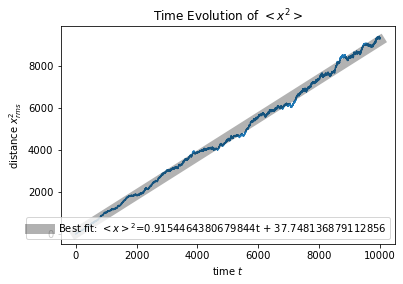

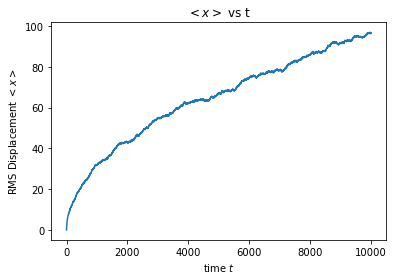

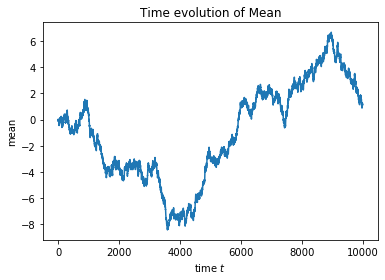

In [20]:
# Linear regression on the RMS Disp.
time = np.arange(0,t)

m_xsq,b_xsq = plt.polyfit(time,xrms**2,1)

plt.plot(time, xrms**2)
plt.plot(time, m_xsq*time+b_xsq,color = 'black',alpha=0.3,lw=10,\
         label = 'Best fit: $<x>^{2}$='+str(m_xsq)+'t + '+str(b_xsq))
plt.title('Time Evolution of $<x^{2}>$')
plt.xlabel('time $t$')
plt.ylabel('distance $x_{rms}^{2}$')
plt.legend(loc = 'lower right')
plt.show()


plt.plot(time, xrms)
plt.title('$<x>$ vs t')
plt.xlabel('time $t$')
plt.ylabel('RMS Displacement $<x>$')
plt.show()


plt.plot(time,mu)
plt.title('Time evolution of Mean')
plt.xlabel('time $t$')
plt.ylabel('mean')
plt.show()

In [21]:
# The Einstein Relation says <x**2> = 2Dt so... we can solve for the diffusion coefficient

D = m_xsq/2

print('Diffusion Coefficient = D = ', D)

Diffusion Coefficient = D =  0.4577232190339922


Since we showed that variance is a linear function of time, diffusion of these random walks is most likely governed by a gaussian. We can see the time evolution of the distribution starting from a delta function, transitioning into a gaussian, then flattening.

The formula for the probability distribution

$$f(x,t) = \frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} $$

where $\frac{d\sigma^{2}}{dt} = 2 D$


It's also like the walkers are being pulled away according to $<x> \propto \sqrt{t}$

So, $\frac{d<x>}{dt} \propto t^{-1/2}$

And $\frac{d^{2}<x>}{dt^{2}} \propto t^{-3/2}$

So, the drunkard appears to be pulled away by a macroscopic force $<F> = -m \frac{D^{2}}{<x>^{3}}$

In [22]:
# Counting Microstates
microstates = np.zeros(t)
for j in range(t):
    X_s = np.sort(X[:,j])
    count = [X_s[0]]
    for i in range(1,len(X_s)):
        if X_s[i] != count[-1]:
            count.append(X_s[i])
    microstates[j] = len(count)

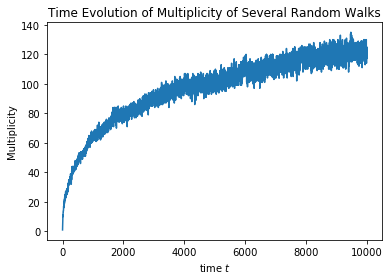

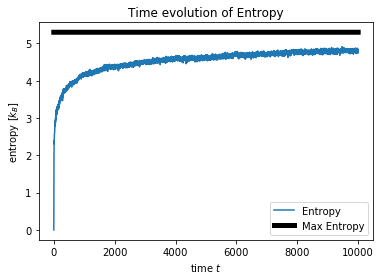

Maximum entropy =  5.298317366548036 kB


In [23]:
#Multiplicity and entropy
plt.plot(time, microstates)
plt.title('Time Evolution of Multiplicity of Several Random Walks')
plt.xlabel('time $t$')
plt.ylabel('Multiplicity')
plt.show()

plt.plot(time, np.log(microstates), label = 'Entropy')
plt.plot(time, np.ones(t) * np.log(num), color = 'black', lw = 5, label = 'Max Entropy' )
plt.title('Time evolution of Entropy')
plt.xlabel('time $t$')
plt.ylabel('entropy [$k_{B}$]')
plt.legend(loc = 'lower right')
plt.show()

print('Maximum entropy = ', np.log(num), 'kB')

This means random walks have a tendency to evolve towards the most disordered state possible. In fact the most ordered microstate is when all walkers are lined up at the start. Here, $\Omega_{i} = 1$. However, after an long amount of time (long enough to the point where $\sigma^{2} \rightarrow \infty$), We expect each walker to occupy their own site. Meaning, $\Omega_{f} = num$